In [4]:
# Importing all the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import scipy.cluster.hierarchy as sch
import warnings
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics

%matplotlib inline

# Task 1

In [ ]:
# Importing dataset 
from google.colab import files
uploaded = files.upload()

In [ ]:
#importing all datasets
data1 = pd.read_csv('/content/Data1.csv')
data2 = pd.read_csv('/content/Data2.csv')
data3 = pd.read_csv('/content/Data3.csv')
data4 = pd.read_csv('/content/Data4.csv')
data5 = pd.read_csv('/content/Data5.csv')
data6 = pd.read_csv('/content/Data6.csv')
data7 = pd.read_csv('/content/Data7.csv')
data8 = pd.read_csv('/content/Data8.csv')

In [ ]:
#Function to change the range of values of column 'Class' from 1 to n to 0 to (n-1)
def change_range(dataset):
  dataset['newClass'] = [i-1 for i in dataset['Class']]
  dataset.drop(columns=['Class', 'Unnamed: 0'], axis=1, inplace=True)
  return dataset

In [ ]:
  # Checking for the number of unique values from column 'Class'
def check_unique_class(dataset):
    k = len(dataset.newClass.unique())
    return k

In [ ]:
#Function to perform k means 
def perform_k_means(dataset,no_of_clusters):
  km = KMeans(n_clusters=no_of_clusters,init='k-means++',max_iter=100, n_init=1,random_state=3425)
  y_predicted = km.fit_predict(dataset)
  dataset['Cluster'] = y_predicted
  return dataset

In [ ]:
# Function for getting clusters using agglomerative hierarchical clustering
def hier_cluster(data, k): 
  h_cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
  y_pred = h_cluster.fit_predict(data) 
  data['Cluster'] = y_pred
  return data 

In [ ]:
#Ploting 3D 
def plot_clustered_3D(dataset):
  x = dataset.iloc[:,0:1]
  y = dataset.iloc[:,1:2]
  z = dataset.iloc[:,2:3]

  fig = plt.figure(figsize = (10, 6))
  ax = plt.axes(projection ="3d")

  # Creating color map
  my_cmap = plt.get_cmap('plasma')
 
  # Creating plot
  sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = dataset['Cluster'],
                    cmap = my_cmap,
                    )
 
  plt.title("Clustered Class Scatter Plot")
  ax.set_xlabel('X-axis', fontweight ='bold')
  ax.set_ylabel('Y-axis', fontweight ='bold')
  ax.set_zlabel('Z-axis', fontweight ='bold')
  fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
  # show plot
  plt.show()
  return sctt

In [ ]:
#Ploting 3D on original class
def plot_class_3D(dataset):
  x = dataset.iloc[:,0:1]
  y = dataset.iloc[:,1:2]
  z = dataset.iloc[:,2:3]

  fig = plt.figure(figsize = (10, 6))
  ax = plt.axes(projection ="3d")

  # Creating color map
  my_cmap = plt.get_cmap('plasma')
 
  # Creating plot
  sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = dataset['newClass'],
                    cmap = my_cmap,
                    )
 
  plt.title("Original Class Scatter Plot")
  ax.set_xlabel('X-axis', fontweight ='bold')
  ax.set_ylabel('Y-axis', fontweight ='bold')
  ax.set_zlabel('Z-axis', fontweight ='bold')
  fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
  # show plot
  plt.show()
  return sctt

In [ ]:
# Function for validating using f1 and accuracy Score 
def external_validate(x_true, x_pred):
  
  # Computing confusion matrix, f1 score, and accuracy score
  c_matrix = confusion_matrix(x_true, x_pred)
  f_score = f1_score(x_true, x_pred, average='macro')
  a_score = accuracy_score(x_true, x_pred)

  # Printing metrics 
  print('Confusion Matrix: ')
  print('')
  print(c_matrix)
  print('')
  print('F1 Score: ', f_score)
  print('')
  print('Accuracy Score: ', a_score)

Equations: 
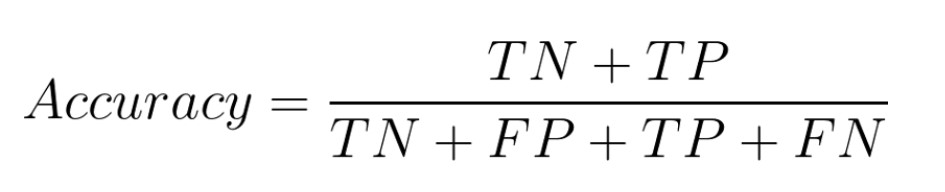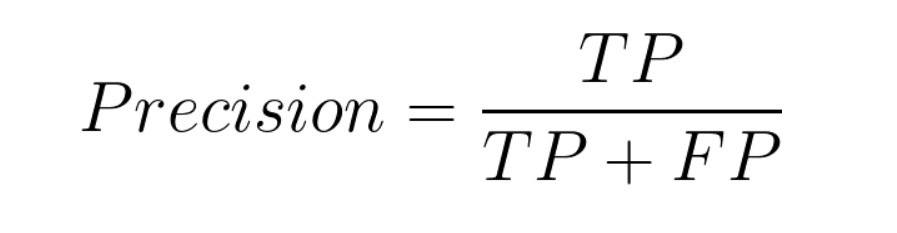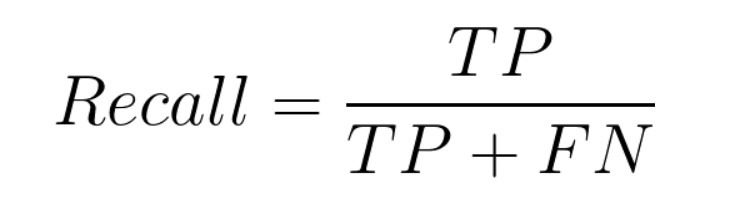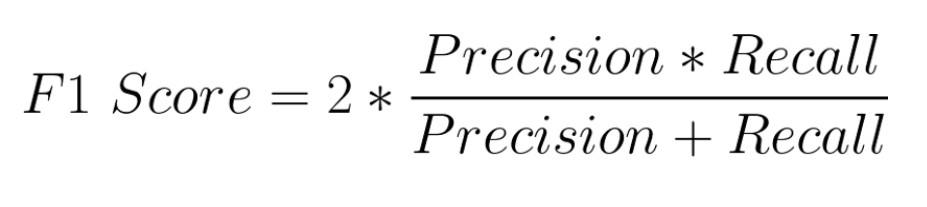

###Data **1**

In [ ]:
# Changing the range of values of column 'Class' from 1 to n to 0 to (n-1)  
data1 = change_range(data1)

In [ ]:
# Checking for the number of unique values from column 'Class'
k=check_unique_class(data1)
print('Unique values in column Class :',k)

Unique values in column Class : 7


In [ ]:
data1.isnull().sum()

X1          0
X2          0
X3          0
newClass    0
dtype: int64

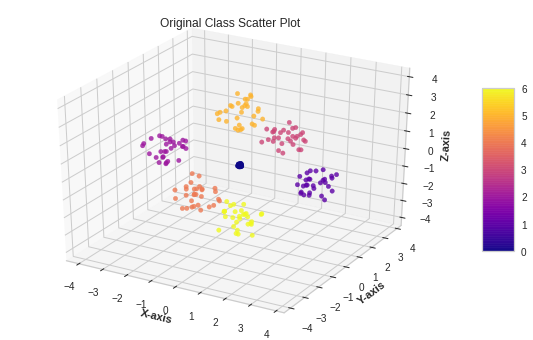

In [ ]:
# Plotting original class for data 1
original_plot = plot_class_3D(data1)

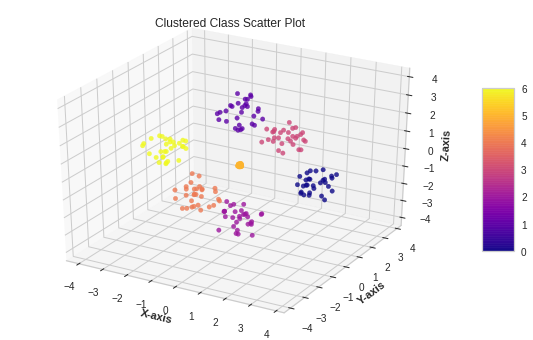

In [ ]:
# Performing K-means clustering
data1 = perform_k_means(data1,k)
clustered_plot = plot_clustered_3D(data1)

In [ ]:
# Validation using F1 and accuracy score
external_validate(data1['newClass'], data1['Cluster'])

Confusion Matrix: 

[[ 0  0  0  0  0 32  0]
 [30  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0 30  0  0  0  0  0]
 [ 0  0 30  0  0  0  0]]

F1 Score:  0.2857142857142857

Accuracy Score:  0.2830188679245283


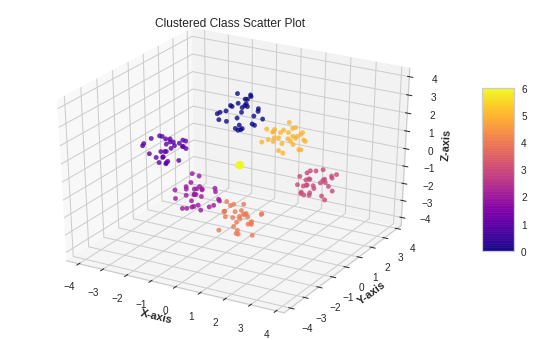

In [ ]:
# Performing agglomerative hierarchical clustering
hier_data1 = hier_cluster(data1, k)
clustered_plot = plot_clustered_3D(hier_data1)

In [ ]:
# Validation using F1 and accuracy score
external_validate(hier_data1['newClass'], hier_data1['Cluster'])

Confusion Matrix: 

[[ 0  0  0  0  0  0 32]
 [ 0  0  0 30  0  0  0]
 [ 0 30  0  0  0  0  0]
 [ 0  0  0  0  0 30  0]
 [ 0  0 30  0  0  0  0]
 [30  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0]]

F1 Score:  0.0

Accuracy Score:  0.0


###Data **2**

In [ ]:
# Changing the range of values of column 'Class' from 1 to n to 0 to (n-1)  
data2 = change_range(data2)

In [ ]:
# Checking for the number of unique values from column 'Class'
k=check_unique_class(data2)
print('Unique values in column Class :',k)

Unique values in column Class : 4


In [ ]:
data2.isnull().sum()

X           0
Y           0
C           0
newClass    0
dtype: int64

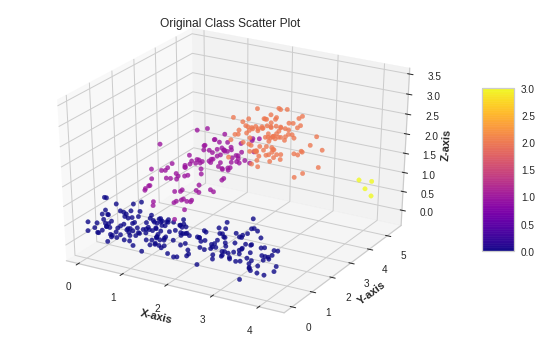

In [ ]:
# Plotting original class for data 2
original_plot = plot_class_3D(data2)

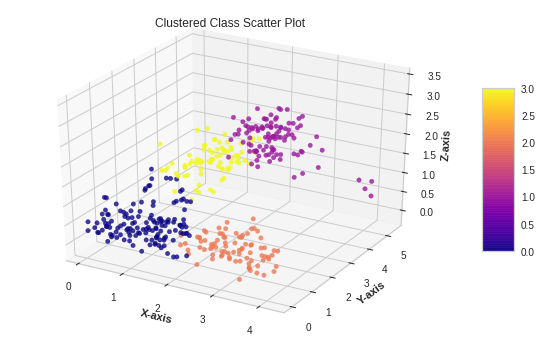

In [ ]:
# Performing K-means clustering
data2 = perform_k_means(data2,k)
clustered_plot = plot_clustered_3D(data2)

In [ ]:
# Validation using F1 and accuracy score
external_validate(data2['newClass'], data2['Cluster'])

Confusion Matrix: 

[[117   0  83   0]
 [ 21   0   0  79]
 [  0 100   0   0]
 [  0   4   0   0]]

F1 Score:  0.17307692307692307

Accuracy Score:  0.2896039603960396


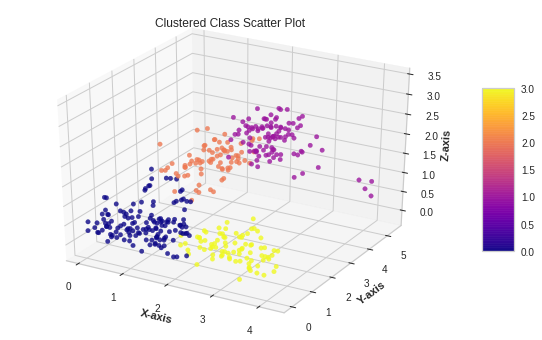

In [ ]:
# Performing agglomerative hierarchical clustering
hier_data2 = hier_cluster(data2, k)
clustered_plot = plot_clustered_3D(hier_data2)

In [ ]:
# Validation using F1 and accuracy score
external_validate(hier_data2['newClass'], hier_data2['Cluster'])

Confusion Matrix: 

[[117   0   0  83]
 [ 21   0  79   0]
 [  0 100   0   0]
 [  0   4   0   0]]

F1 Score:  0.17307692307692307

Accuracy Score:  0.2896039603960396


###Data **3**

In [ ]:
# Changing the range of values of column 'Class' from 1 to n to 0 to (n-1)  
data3 = change_range(data3)

In [ ]:
# Checking for the number of unique values from column 'Class'
k=check_unique_class(data3)
print('Unique values in column Class :',k)

Unique values in column Class : 4


In [ ]:
data3.isnull().sum()

X1          0
X2          0
X3          0
newClass    0
dtype: int64

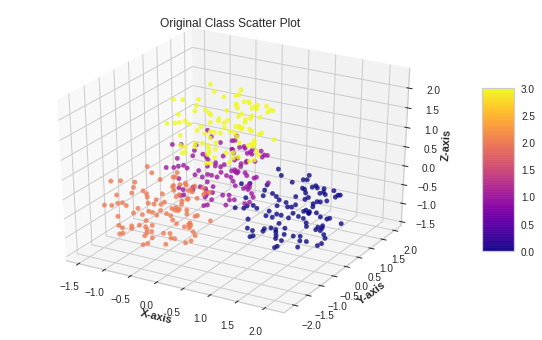

In [ ]:
# Plotting original class for data 3
original_plot = plot_class_3D(data3)

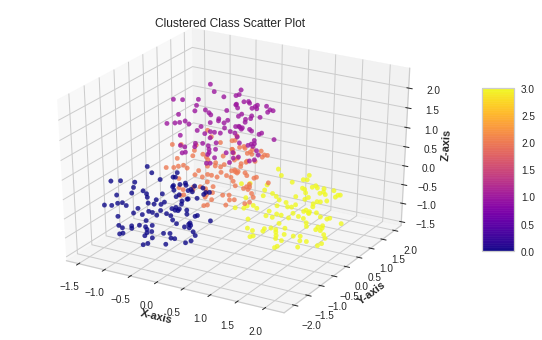

In [ ]:
# Performing K-means clustering
data3 = perform_k_means(data3,k)
clustered_plot = plot_clustered_3D(data3)

In [ ]:
# Validation using F1 and accuracy score
external_validate(data3['newClass'], data3['Cluster'])

Confusion Matrix: 

[[  0   0   0 100]
 [  0   0 100   0]
 [100   0   0   0]
 [  0 100   0   0]]

F1 Score:  0.0

Accuracy Score:  0.0


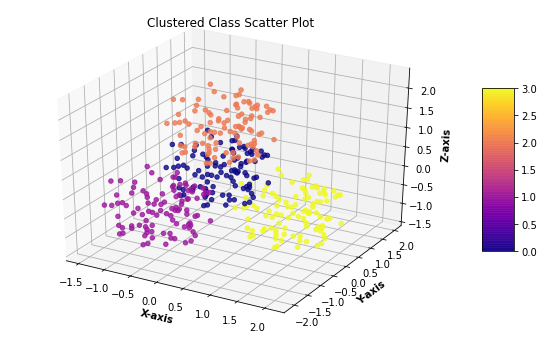

In [ ]:
# Performing agglomerative hierarchical clustering
hier_data3 = hier_cluster(data3, k)
clustered_plot = plot_clustered_3D(hier_data3)

In [ ]:
# Validation using F1 and accuracy score
external_validate(hier_data3['newClass'], hier_data3['Cluster'])

Confusion Matrix: 

[[  0   0   0 100]
 [100   0   0   0]
 [  0 100   0   0]
 [  0   0 100   0]]

F1 Score:  0.0

Accuracy Score:  0.0


###Data **4**

In [ ]:
# Changing the range of values of column 'Class' from 1 to n to 0 to (n-1)  
data4 = change_range(data4)

In [ ]:
# Checking for the number of unique values from column 'Class'
k=check_unique_class(data4)
print('Unique values in column Class :',k)

Unique values in column Class : 2


In [ ]:
data4.isnull().sum()

X1          0
X2          0
X3          0
newClass    0
dtype: int64

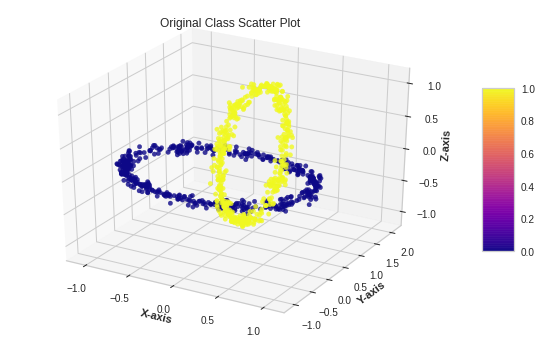

In [ ]:
# Plotting original class for data 4
original_plot = plot_class_3D(data4)

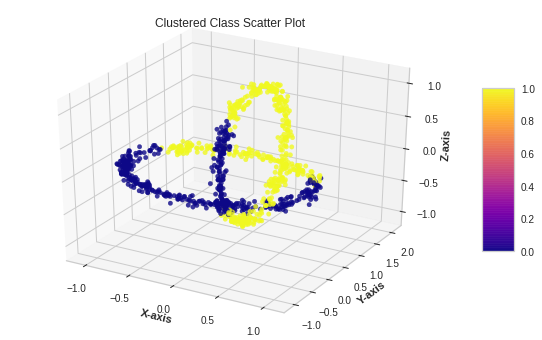

In [ ]:
# Performing K-means clustering
data4 = perform_k_means(data4,k)
clustered_plot = plot_clustered_3D(data4)

In [ ]:
# Validation using F1 and accuracy score
external_validate(data4['newClass'], data4['Cluster'])

Confusion Matrix: 

[[343 157]
 [139 361]]

F1 Score:  0.7039040649170332

Accuracy Score:  0.704


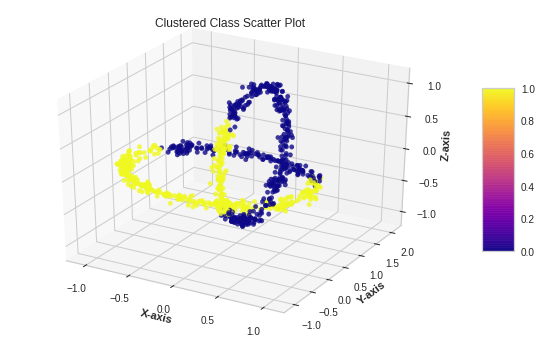

In [ ]:
# Performing agglomerative hierarchical clustering
hier_data4 = hier_cluster(data4, k)
clustered_plot = plot_clustered_3D(hier_data4)

In [ ]:
# Validation using F1 and accuracy score
external_validate(hier_data4['newClass'], hier_data4['Cluster'])

Confusion Matrix: 

[[157 343]
 [361 139]]

F1 Score:  0.2957718300729436

Accuracy Score:  0.296


###Data **5**

In [ ]:
# Changing the range of values of column 'Class' from 1 to n to 0 to (n-1)  
data5 = change_range(data5)

In [ ]:
# Checking for the number of unique values from column 'Class'
k=check_unique_class(data5)
print('Unique values in column Class :',k)

Unique values in column Class : 2


In [ ]:
data5.isnull().sum()

X1          0
X2          0
X3          0
newClass    0
dtype: int64

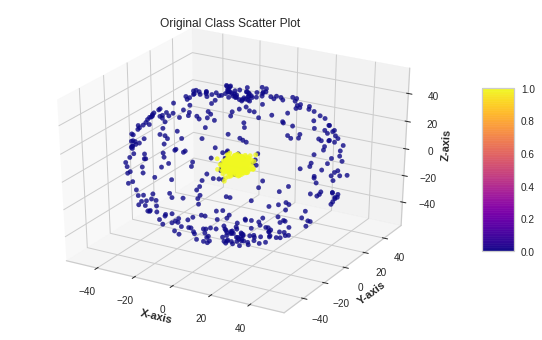

In [ ]:
# Plotting original class for data 5
original_plot = plot_class_3D(data5)

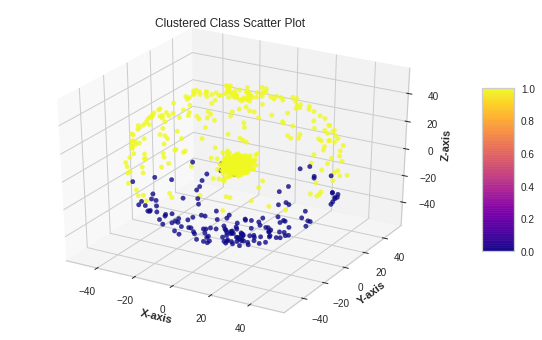

In [ ]:
# Performing K-means clustering
data5 = perform_k_means(data5,k)
clustered_plot = plot_clustered_3D(data5)

In [ ]:
# Validation using F1 and accuracy score
external_validate(data5['newClass'], data5['Cluster'])

Confusion Matrix: 

[[153 247]
 [  0 400]]

F1 Score:  0.6587166294467444

Accuracy Score:  0.69125


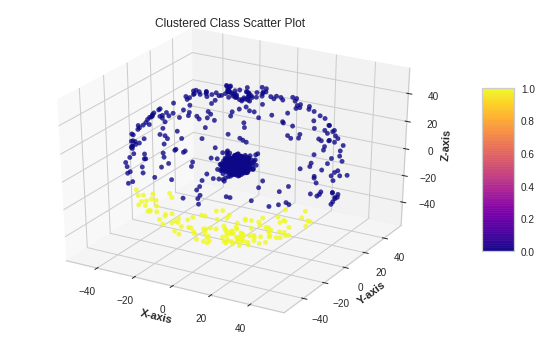

In [ ]:
# Performing agglomerative hierarchical clustering
hier_data5 = hier_cluster(data5, k)
clustered_plot = plot_clustered_3D(hier_data5)

In [ ]:
# Validation using F1 and accuracy score
external_validate(hier_data5['newClass'], hier_data5['Cluster'])

Confusion Matrix: 

[[274 126]
 [400   0]]

F1 Score:  0.25512104283054005

Accuracy Score:  0.3425


###Data **6**

In [ ]:
# Changing the range of values of column 'Class' from 1 to n to 0 to (n-1)  
data6 = change_range(data6)

In [ ]:
# Checking for the number of unique values from column 'Class'
k=check_unique_class(data6)
print('Unique values in column Class :',k)

Unique values in column Class : 2


In [ ]:
data6.isnull().sum()

X1          0
X2          0
newClass    0
dtype: int64

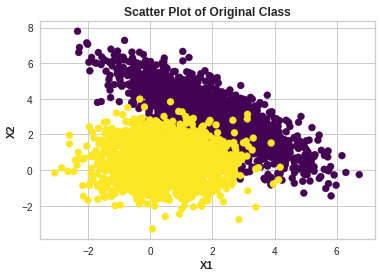

In [ ]:
# Plotting original class for data 6
ax = plt.axes()
color_map = plt.get_cmap('viridis')
plt.scatter(data6['X1'], data6['X2'], c = data6['newClass'], cmap=color_map)
plt.title('Scatter Plot of Original Class', fontweight ='bold')
ax.set_xlabel('X1', fontweight ='bold')
ax.set_ylabel('X2', fontweight ='bold')
plt.show()

In [ ]:
# Performing K-means clustering
data6 = perform_k_means(data6,k)

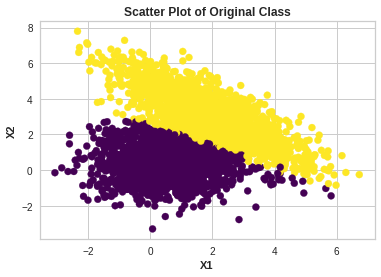

In [ ]:
# Plotting clusters formed by k-means algorithm
ax = plt.axes()
color_map = plt.get_cmap('viridis')
plt.scatter(data6['X1'], data6['X2'], c = data6['Cluster'], cmap=color_map)
plt.title('Scatter Plot of K-means CLustered Class', fontweight ='bold')
ax.set_xlabel('X1', fontweight ='bold')
ax.set_ylabel('X2', fontweight ='bold')
plt.show()

In [ ]:
# Validation using F1 and accuracy score
external_validate(data6['newClass'], data6['Cluster'])

Confusion Matrix: 

[[  30 2018]
 [1938  110]]

F1 Score:  0.03381111569049473

Accuracy Score:  0.0341796875


In [ ]:
# Performing agglomerative hierarchical clustering
hier_data6 = hier_cluster(data6, k)

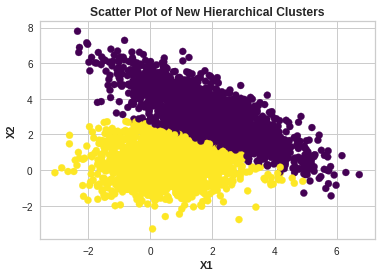

In [ ]:
# Plotting clusters formed by hierarchical clustering algorithm
ax = plt.axes()
color_map = plt.get_cmap('viridis')
plt.scatter(hier_data6['X1'], hier_data6['X2'], c = hier_data6['Cluster'], cmap=color_map)
plt.title('Scatter Plot of New Hierarchical Clusters', fontweight ='bold')
ax.set_xlabel('X1', fontweight ='bold')
ax.set_ylabel('X2', fontweight ='bold')
plt.show()

In [ ]:
# Validation using F1 and accuracy score
external_validate(hier_data6['newClass'], hier_data6['Cluster'])

Confusion Matrix: 

[[2021   27]
 [ 110 1938]]

F1 Score:  0.9665389947375504

Accuracy Score:  0.966552734375


###Data **7**

In [ ]:
# Changing the range of values of column 'Class' from 1 to n to 0 to (n-1)  
data7 = change_range(data7)

In [ ]:
# Checking for the number of unique values from column 'Class'
k=check_unique_class(data7)
print('Unique values in column Class :',k)

Unique values in column Class : 6


In [ ]:
data7.isnull().sum()

X1          0
X2          0
newClass    0
dtype: int64

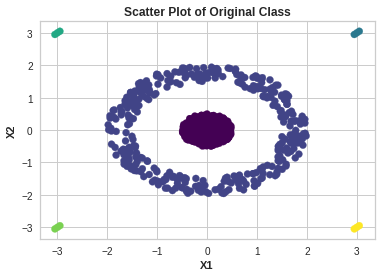

In [ ]:
# Plotting original class for data 7
ax = plt.axes()
color_map = plt.get_cmap('viridis')
plt.scatter(data7['X1'], data7['X2'], c = data7['newClass'], cmap=color_map)
plt.title('Scatter Plot of Original Class', fontweight ='bold')
ax.set_xlabel('X1', fontweight ='bold')
ax.set_ylabel('X2', fontweight ='bold')
plt.show()

In [ ]:
# Performing K-means clustering
data7 = perform_k_means(data7,k)

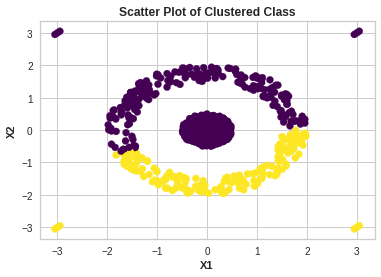

In [ ]:
# Plotting clusters formed by kmeans algorithm
ax = plt.axes()
color_map = plt.get_cmap('viridis')
plt.scatter(data7['X1'], data7['X2'], c = data7['Cluster'], cmap=color_map)
plt.title('Scatter Plot of Clustered Class', fontweight ='bold')
ax.set_xlabel('X1', fontweight ='bold')
ax.set_ylabel('X2', fontweight ='bold')
plt.show()

In [ ]:
# Validation using F1 and accuracy score
external_validate(data7['newClass'], data7['Cluster'])

Confusion Matrix: 

[[395   0   0   0   0   0]
 [197 166   0   0   0   0]
 [  3   0   0   0   0   0]
 [  3   0   0   0   0   0]
 [  0   3   0   0   0   0]
 [  0   3   0   0   0   0]]

F1 Score:  0.23602162175728544

Accuracy Score:  0.7285714285714285


In [ ]:
# Performing agglomerative hierarchical clustering
hier_data7 = hier_cluster(data7, k)

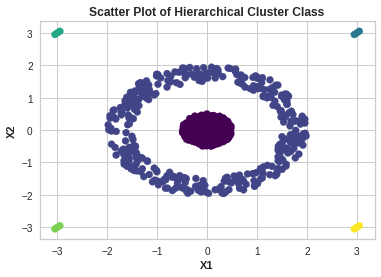

In [ ]:
# Plotting clusters formed by hierarchical clustering algorithm
ax = plt.axes()
color_map = plt.get_cmap('viridis')
plt.scatter(hier_data7['X1'],hier_data7['X2'], c = hier_data7['Cluster'], cmap=color_map)
plt.title('Scatter Plot of Hierarchical Cluster Class', fontweight ='bold')
ax.set_xlabel('X1', fontweight ='bold')
ax.set_ylabel('X2', fontweight ='bold')
plt.show()

In [ ]:
# Validation using F1 and accuracy score
external_validate(hier_data7['newClass'], hier_data7['Cluster'])

Confusion Matrix: 

[[395   0   0   0   0   0]
 [197 166   0   0   0   0]
 [  3   0   0   0   0   0]
 [  3   0   0   0   0   0]
 [  0   3   0   0   0   0]
 [  0   3   0   0   0   0]]

F1 Score:  0.23602162175728544

Accuracy Score:  0.7285714285714285


###Data **8**

In [ ]:
# Changing the range of values of column 'Class' from 1 to n to 0 to (n-1)  
data8 = change_range(data8)

In [ ]:
# Checking for the number of unique values from column 'Class'
k=check_unique_class(data8)
print('Unique values in column Class :',k)

Unique values in column Class : 1


In [ ]:
data8.isnull().sum()

X1          0
X2          0
X3          0
newClass    0
dtype: int64

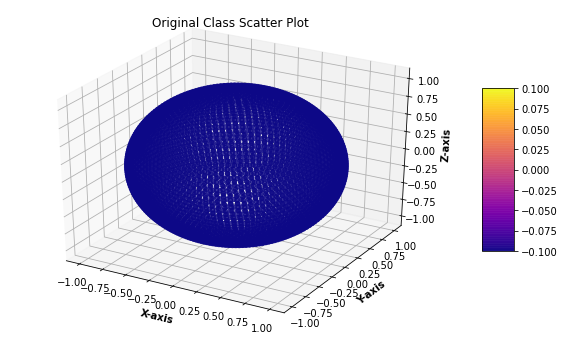

In [ ]:
# Plotting original class for data 8
original_plot = plot_class_3D(data8)

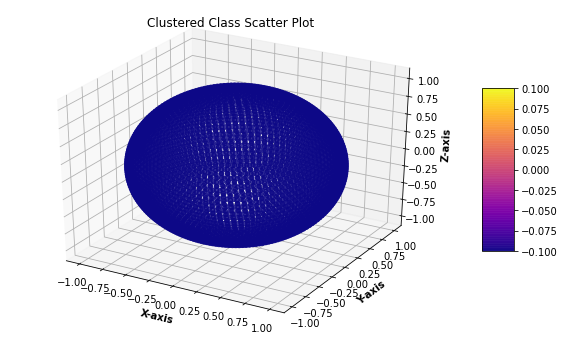

In [ ]:
# Performing K-means clustering
data8 = perform_k_means(data8,k)
clustered_plot = plot_clustered_3D(data8)

In [ ]:
# Validation using F1 and accuracy score
external_validate(data8['newClass'], data8['Cluster'])

Confusion Matrix: 

[[4002]]

F1 Score:  1.0

Accuracy Score:  1.0


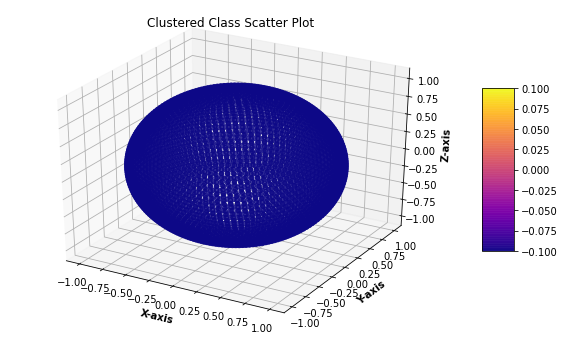

In [ ]:
# Performing agglomerative hierarchical clustering
hier_data8 = hier_cluster(data8, k)
clustered_plot = plot_clustered_3D(hier_data8)

In [ ]:
# Validation using F1 and accuracy score
external_validate(hier_data8['newClass'], hier_data8['Cluster'])

Confusion Matrix: 

[[4002]]

F1 Score:  1.0

Accuracy Score:  1.0


# Task 2

In [1]:
! pip install yellowbrick #for silhouette analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# Reading the world indicators dataset
df = pd.read_csv("/content/World Indicators.csv")

In [16]:
df.shape

(208, 20)

In [17]:
# Getting the first 5 records of the dataframe
df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

In [19]:
# Checking for null values in dataframe
df.isnull().sum()  

Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64

In [20]:
# Removing '$' and ',' from column 'GDP'
df['GDP'] = df['GDP'].str.replace(',', '') 
df['GDP'] = df['GDP'].str.replace('$', '')
df['GDP']

0        199070864638
1        104115863405
2          7294900431
3         15292424757
4         10395757480
            ...      
203               NaN
204    15533800000000
205       47236710623
206      316482176579
207               NaN
Name: GDP, Length: 208, dtype: object

In [21]:
df['Business Tax Rate'] = df['Business Tax Rate'].str.replace('%', '')
df['Business Tax Rate']

0      72.0
1      52.1
2      65.9
3      19.5
4      43.5
       ... 
203     NaN
204    46.5
205    41.9
206    62.8
207     NaN
Name: Business Tax Rate, Length: 208, dtype: object

In [22]:
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace(',', '')
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace('$', '')
df['Health Exp/Capita']

0       233
1       178
2        34
3       404
4        39
       ... 
203     NaN
204    8467
205    1213
206     487
207     NaN
Name: Health Exp/Capita, Length: 208, dtype: object

In [23]:
df.drop(['Country'], axis=1, inplace=True)

In [24]:
df2=df.dropna(how='all')

In [25]:
X = df2
y = df2['Region']

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Region'] = le.fit_transform(X['Region'])

y = le.transform(y)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

In [28]:
X.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region
0,0.025,72.0,25.0,41852.0,199070864638,0.044,233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,0
1,0.046,52.1,66.0,13576.0,104115863405,0.034,178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,0
2,0.037,65.9,29.0,3761.0,7294900431,0.045,34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,0
3,0.024,19.5,60.0,2215.0,15292424757,0.052,404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,0
4,0.042,43.5,13.0,NaN,10395757480,0.064,39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,0


In [29]:
X_=X.dropna(subset=['Energy Usage','Lending Interest','Birth Rate'])
print(X_)

     Birth Rate Business Tax Rate  Days to Start Business  Energy Usage  \
0         0.025              72.0                    25.0       41852.0   
1         0.046              52.1                    66.0       13576.0   
3         0.024              19.5                    60.0        2215.0   
10        0.044             339.1                    65.0       24497.0   
14        0.024              43.6                     8.0       77649.0   
..          ...               ...                     ...           ...   
194       0.020              36.6                    25.0       20582.0   
202       0.015              29.1                    41.0       20918.0   
204       0.013              46.5                     5.0     2191193.0   
205       0.015              41.9                     7.0        4430.0   
206       0.020              62.8                   141.0       70198.0   

                GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0      199070864638    

In [30]:
X_.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region
0,0.025,72.0,25.0,41852.0,199070864638,0.044,233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,0
1,0.046,52.1,66.0,13576.0,104115863405,0.034,178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,0
3,0.024,19.5,60.0,2215.0,15292424757,0.052,404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,0
10,0.044,339.1,65.0,24497.0,23831631365,0.061,15,336.0,0.090,0.0,0.438,51.0,48.0,0.2,0.453,0.519,0.028,0.404,0
14,0.024,43.6,8.0,77649.0,236000735704,0.049,137,433.0,0.019,0.4,0.110,73.0,68.0,1.1,0.314,0.631,0.056,0.430,0


In [31]:
X_.dropna(inplace=True)

In [ ]:
#X_.to_csv('WI3.csv', index=False)

In [32]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_ = ms.fit_transform(X_)

In [33]:
cols = X.columns

In [34]:
X_ = pd.DataFrame(X_, columns=[cols])

In [35]:
X_.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region
0,0.447368,0.192319,0.171429,0.015034,0.012529,0.158228,0.023611,0.161856,0.200000,0.111111,0.172811,0.650,0.647059,0.411765,0.405797,0.509804,0.162996,0.650933,0.0
1,1.000000,0.132144,0.464286,0.004664,0.006415,0.094937,0.017654,0.095944,1.000000,0.111111,0.421659,0.175,0.088235,0.176471,1.000000,0.000000,0.061674,0.351262,0.0
2,0.421053,0.033565,0.421429,0.000498,0.000695,0.208861,0.042131,0.045242,0.352381,0.111111,0.241935,0.000,0.000000,0.764706,0.602899,0.352941,0.110132,0.522503,0.0
3,0.947368,1.000000,0.457143,0.008669,0.001245,0.265823,0.000000,0.117005,0.838095,0.000000,0.997696,0.125,0.029412,0.000000,0.930435,0.056022,0.079295,0.345774,0.0
4,0.421053,0.106441,0.050000,0.028161,0.014907,0.189873,0.013213,0.154836,0.161905,0.444444,0.241935,0.675,0.617647,0.529412,0.527536,0.369748,0.202643,0.374314,0.0


In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X_)

KMeans(n_clusters=2, random_state=0)

In [37]:
kmeans.cluster_centers_

array([[0.15281625, 0.0931623 , 0.13984962, 0.05727975, 0.05652996,
        0.33166778, 0.17039376, 0.11300873, 0.07134503, 0.62183236,
        0.2139219 , 0.83377193, 0.78224974, 0.57378741, 0.20244088,
        0.52739692, 0.44338821, 0.69464826, 0.55789474],
       [0.55789474, 0.13777845, 0.23071429, 0.02050922, 0.01094424,
        0.24324895, 0.0156901 , 0.11212949, 0.36888889, 0.17037037,
        0.35092166, 0.50833333, 0.44803922, 0.36862745, 0.66753623,
        0.27478992, 0.13480176, 0.41035492, 0.32      ]])

In [38]:
kmeans.inertia_

47.37652170633719

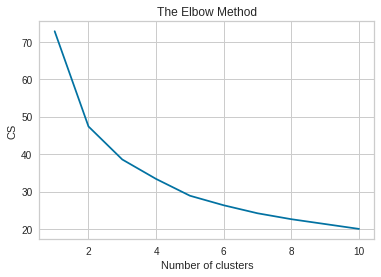

In [39]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [40]:
metrics.silhouette_score(X_, kmeans.labels_, metric='euclidean')

0.20147287810835568

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [42]:
data = X_

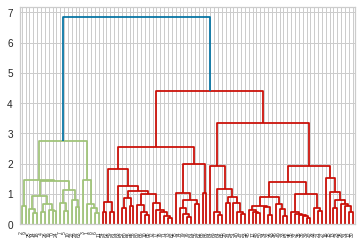

In [43]:
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [44]:
# Dunn index
def normalize_to_smallest_integers(labels): 
    """Normalizes a list of integers so that each number is reduced to the minimum possible integer, maintaining the order of elements.
    :param labels: the list to be normalized
    :returns: a numpy.array with the values normalized as the minimum integers between 0 and the maximum possible value.
    """

    max_v = len(set(labels)) if -1 not in labels else len(set(labels)) - 1
    sorted_labels = np.sort(np.unique(labels))
    unique_labels = range(max_v)
    new_c = np.zeros(len(labels), dtype=np.int32)

    for i, clust in enumerate(sorted_labels):
        new_c[labels == clust] = unique_labels[i]

    return new_c

In [45]:
# Dunn index
def dunn(labels, distances): 

    labels = normalize_to_smallest_integers(labels)

    unique_cluster_distances = np.unique(min_cluster_distances(labels, distances))
    max_diameter = max(diameter(labels, distances))

    if np.size(unique_cluster_distances) > 1:
        return unique_cluster_distances[1] / max_diameter
    else:
        return unique_cluster_distances[0] / max_diameter

In [46]:
# Dunn index
def min_cluster_distances(labels, distances): 

    labels = normalize_to_smallest_integers(labels)
    n_unique_labels = len(np.unique(labels))

    min_distances = np.zeros((n_unique_labels, n_unique_labels))
    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i + 1, len(labels)):
            if labels[i] != labels[ii] and distances[i, ii] < min_distances[labels[i], labels[ii]]:
                min_distances[labels[i], labels[ii]] = min_distances[labels[ii], labels[i]] = distances[i, ii]
    return min_distances


In [47]:
# Dunn index
def diameter(labels, distances): 

    labels = normalize_to_smallest_integers(labels)
    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i + 1, len(labels)):
            if labels[i] == labels[ii] and distances[i, ii] > diameters[labels[i]]:
                diameters[labels[i]] = distances[i, ii]
    return diameters

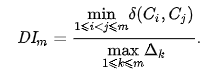

In [48]:
print (X_)

   Birth Rate Business Tax Rate Days to Start Business Energy Usage       GDP  \
0    0.447368          0.192319               0.171429     0.015034  0.012529   
1    1.000000          0.132144               0.464286     0.004664  0.006415   
2    0.421053          0.033565               0.421429     0.000498  0.000695   
3    0.947368          1.000000               0.457143     0.008669  0.001245   
4    0.421053          0.106441               0.050000     0.028161  0.014907   
..        ...               ...                    ...          ...       ...   
82   0.315789          0.085274               0.171429     0.007234  0.010693   
83   0.184211          0.062594               0.285714     0.007357  0.001235   
84   0.131579          0.115210               0.028571     0.803242  1.000000   
85   0.184211          0.101300               0.042857     0.001310  0.002752   
86   0.315789          0.164500               1.000000     0.025429  0.020090   

   Health Exp % GDP Health 

In [ ]:
# Dunn index
if __name__ == '__main__': 
    from sklearn.metrics.pairwise import euclidean_distances
    from sklearn.datasets import load_iris
    from sklearn.cluster import KMeans

    c = X_['Birth Rate']
    x = X_['GDP']
    k = KMeans(n_clusters=1).fit_predict(x)
    dund = dunn(c, euclidean_distances(x))
    dunk = dunn(k, euclidean_distances(x))

    print(x, c, dund, dunk)

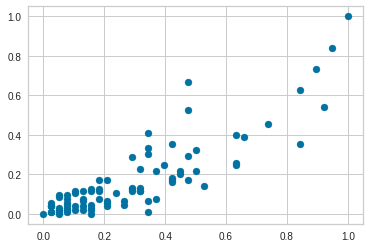

In [50]:
plt.scatter(x=X_['Birth Rate'], y=X_['Infant Mortality Rate'])
plt.show()

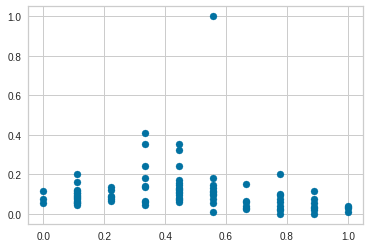

In [51]:
plt.scatter(x=X_['Internet Usage'], y=X_['Hours to do Tax'])
plt.show()

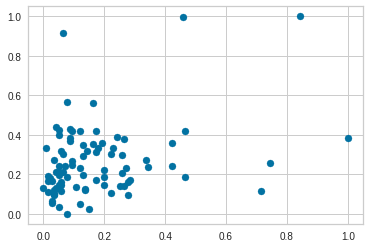

In [52]:
plt.scatter(x=X_['Days to Start Business'], y=X_['Lending Interest'])
plt.show()

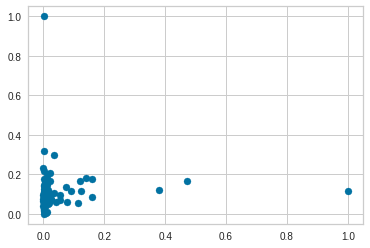

In [53]:
plt.scatter(x=X_['GDP'], y=X_['Business Tax Rate'])
plt.show()

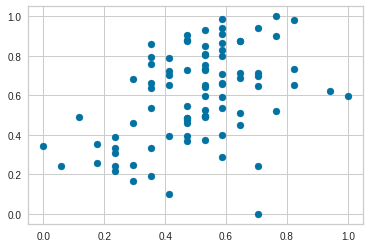

In [54]:
plt.scatter(x=X_['Mobile Phone Usage'], y=X_['Population Urban'])
plt.show()

In [ ]:
#Countries in Region 0: Algeria, Angola, Botswana, Congo, Dem. Rep., Equatorial Guinea, Malawi, Namibia, Nigeria, South Africa, Tanzania, Zambia
#Countries in Region 1: Armenia, Azerbaijan, Bangladesh, Brunei Darussalam, China, Georgia, India, Indonesia, Japan, Korea, Rep., Kyrgyz Republic, Malaysia, Mongolia, Pakistan, Philippines, Singapore, Sri Lanka, Tajikistan, Thailand, Vietnam
#Countries in Region 2: Albania, Belarus, Bosnia and Herzegovina, Bulgaria, Croatia, Czech Republic, Estonia, Hungary, Iceland, Italy, Latvia, Macedonia, FYR, Malta, Maldova, Montenegro, Netherlands, Romania, Russian Federation, Serbia, Switzerland, Ukraine, United Kingdom
#Countries in Region 3: Bahrain, Iran, Islamic Rep., Iraq, Israel, Jordan, Kuwait, Lebanon, Oman, Qatar, Yemen, Rep. 
#Countries in Region 4: Australia, New Zealand
#Countries in Region 5: Argentina, Bolivia, Brazil, Canada, Chile, Colombia, Costa Rica, Dominican Republic, Guatemala, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Paraguay, Peru, Trinidad and Tobago, United States, Uruguay, Venezuela, RB

#The best clustering solution from the above is found out to be KMeans by the analysis methods

In [ ]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!jupyter nbconvert --to html /content/Project1_Group5.ipynb

[NbConvertApp] Converting notebook /content/Project1_Group5.ipynb to html
[NbConvertApp] Writing 2673592 bytes to /content/Project1_Group5.html
